# 21회 기출분석 (4) 

2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)<br>
다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. <br>
<br><br>
3. ANOVA분석 (9점)<br>
변수 3개(하나는 범주형 변수/ 나머지 두 개는 수치형 연속변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>


In [5]:
import pandas as pd
import numpy as np
import mglearn

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)


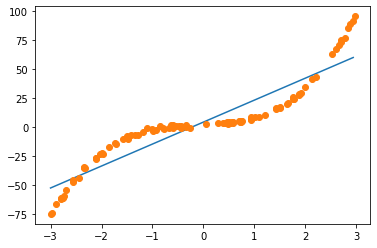

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line))
plt.plot(X[:,0], y, 'o')


In [7]:
from sklearn.preprocessing import PolynomialFeatures
## x**3 까지 3차항을 적용시켜야 함 
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [9]:
line_poly = poly.transform(line)

In [11]:
reg = LinearRegression().fit(X_poly, y)

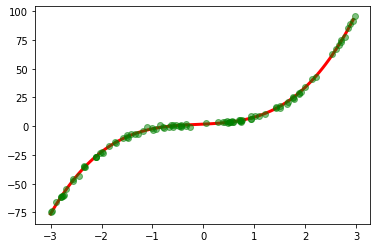

In [14]:
plt.plot(line, reg.predict(line_poly), c='r',linewidth=3)
plt.plot(X,y,'o',c = 'g', alpha=0.5)

In [15]:
reg.coef_

array([[2.0892143 , 1.00574117, 2.9944592 ]])

## 3. ANOVA분석 (9점)<br>
변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)<br>
이원분산분석을 수행하고 통계표를 작성하시오.<br>

예제 : 생존과 요금, 나이에 대해 이원분산분석을 수행하라 

분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

- <b>가. 상호작용효과 검정에 대한 가설</b><br>
1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. <br>
2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. <br>


- <b>나. 주효과 검정에 대한 가설</b> <br>
1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 
<br> 


In [16]:
avocado = pd.read_csv('../data/avocado.csv')
avocado = avocado[["AveragePrice","type","region"]]
avocado = avocado[(avocado['region']=='Orlando') | (avocado['region']=='Boston' )| (avocado['region']=='Chicago')].reset_index(drop=True)
avocado


,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [17]:
## 독립변수 type,region 종속변수 AveragePrice 을 Series로 변경 

AveragePrice = avocado["AveragePrice"]
avocado_type = avocado["type"]
region = avocado["region"]

In [19]:
## 분산분석 수행 

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~C(avocado_type)*C(region)' 
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)

In [20]:
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


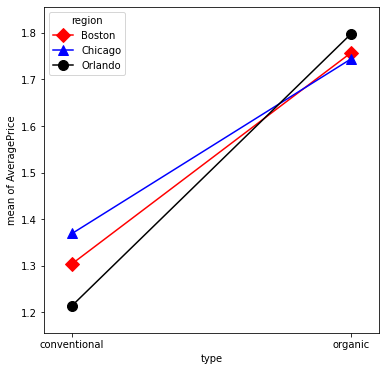

In [22]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, region , AveragePrice,colors=['red', 'blue', 'black'], markers=['D', '^','o'], ms=10, ax=ax)